In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
execfile ("_ExploreMocksOneNoiseRezEach.py")

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:553: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:390: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:355: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


In [28]:
print 0.999*np.mean(alphas), 1.001*np.mean(alphas), np.mean(alphas)*0.002/11
print np.mean(alphas)
print np.std(alphas)**2*0.9

0.999584646029 1.00158581649 0.000181924587502
1.00058523126
0.000595643436413


In [6]:
print 0.0257326356226**2
print mu.reshape(-1)[max_ind]
print (sigma.reshape(-1)[max_ind])
print max_ind

0.000662168536086
1.00095883747
0.000178766944898
71


/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/scipy/stats/_multivariate.py:501: RuntimeWarning: overflow encountered in exp
  out = np.exp(self._logpdf(x, mean, psd.U, psd.log_pdet, psd.rank))


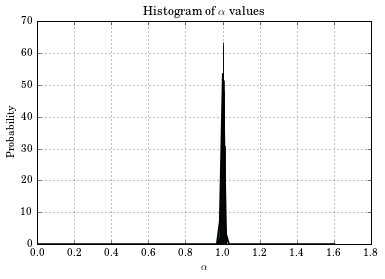

For l_max = 8 and n_max = 6, the RMS error on the alpha recovery is 0.00729606836036.


In [8]:
execfile ("_Alpharobustness.py")

0.00734016309932


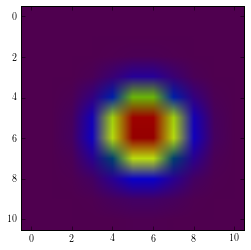

In [9]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(posterior)
print np.sqrt(sigma.reshape(-1)[max_ind])

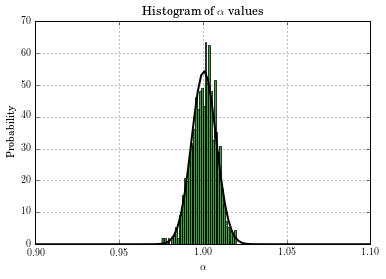

In [10]:
n, bins, patches = plt.hist(alphas, 40, normed=1, facecolor='green', alpha=0.75)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# bug: the Tex interpretor doesn't work properly...
plt.xlabel(r'$\alpha$')
plt.ylabel('Probability')
plt.title(r'Histogram of $\alpha$ values')
x = np.linspace(0.9,1.1, 100)
rv = norm()
plt.plot(x, norm.pdf(x, loc=mu.reshape(-1)[max_ind], scale=np.sqrt(sigma.reshape(-1)[max_ind])), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)


plt.savefig('RobustnessAnalysis/alphahist_lmax'+str(beatbox.Universe.truncated_lmax)+'_nmin'+str(beatbox.Universe.truncated_lmin)+'_nmax'+str(beatbox.Universe.truncated_nmax)+'_nmin'+str(beatbox.Universe.truncated_nmin)+'_2.png')


plt.show()

In [7]:
for i in range(1000):
    rec_fn=beatbox.You.all_reconstructed_universes[i].ay
    np.savetxt( "RobustnessAnalysis/1000realizations_nmax6_lmax8/rec_ay"+str(i)+".txt", rec_fn)

In [3]:
from scipy.stats import chi2
print 1-chi2.cdf(1.14, 5) 

0.950502397598


In [12]:
print len(beatbox.You.all_reconstructed_universes)
print len(beatbox.You.all_simulated_universes)

0
0


In [ ]:
beatbox.You.solve_for_3D_potential(MockUniverse[-1].ay2ayreal_for_inference(MockUniverse[-1].ay))
Delta_fn = beatbox.You.all_simulated_universes[-1].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[-1].fn
chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn)) 
print chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn))
print p_value, chi2value

In [ ]:
pvals=np.array([])
chi2vals=np.array([])
for a in range(10000):
    beatbox.You.solve_for_3D_potential(MockUniverse[a].ay2ayreal_for_inference(MockUniverse[a].ay))
    Delta_fn = beatbox.You.all_simulated_universes[a].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[a].fn
    chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
    p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[a].fn)) 
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

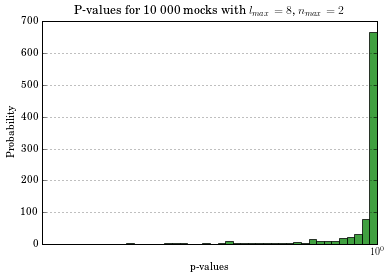

In [4]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(pvals,bins=np.logspace(-0.05, 0.0, 100), facecolor='green', alpha=0.75)
plt.gca().set_xscale("log")
#n, bins, patches = plt.hist(pvals,bins=np.linspace(0.9, 1.0, 100), facecolor='green', alpha=0.75)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'p-values')
plt.ylabel('Probability')
plt.title(r'P-values for 10 000 mocks with $l_{max}=8$, $n_{max}=2$')
plt.xlim(0.95,1)

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/pvalshist_lmax8_nmax2.png')

plt.show()

In [4]:
from scipy.stats import chi2


In [82]:
print np.mean(pvals)

0.989597854671


In [5]:
from scipy.special import erfinv
print erfinv(0.9999892)*np.sqrt(2)
from scipy.special import erf
print erf(4.*1./np.sqrt(2))
print erfinv( 1-np.mean(pvals))*np.sqrt(2)
print erf(np.sqrt(0.004/2))

4.40050347086
0.999936657516
0.0130375251183
0.0504290288489


In [7]:

probabilities2=chi2.cdf(chi2vals, len(beatbox.You.all_simulated_universes[-1].fn)) 
sigmas_dev=erfinv(probabilities2)*np.sqrt(2)


In [156]:
print sigmas_dev[:50]
print (erfinv(pvals)*np.sqrt(2))[:50]
print chi2vals[:50]
#print pvals[:300]

[  1.35304152e-05   4.70838032e-03   7.51478188e-08   2.02270395e-05
   1.81603471e-07   1.93850701e-03   1.23965313e-04   5.93142929e-07
   3.51307895e-07   2.82318523e-11   1.79740269e-02   2.83238827e-05
   2.72456260e-02   2.44864928e-06   1.62463115e-03   4.82579512e-02
   3.93695958e-09   4.47317852e-05   3.03407265e-02   1.76505494e-04
   1.76011215e-05   3.10933285e-06   1.92641614e-05   6.30792119e-04
   7.05888479e-07   5.97515700e-09   9.20811068e-04   6.93664430e-08
   2.94154034e-04   5.65088189e-04   1.06814965e-04   1.42747581e-07
   1.68122608e-03   3.90918099e-02   2.69941978e-05   1.21988724e-09
   3.46211616e-05   7.73422807e-06   1.00028609e-02   3.91529710e-06
   3.43379775e-04   9.19497185e-05   2.57504656e-03   3.54159274e-03
   5.52514355e-09   4.26498062e-05   5.54418775e-05   5.92269241e-04
   8.39619800e-10   5.18523098e-07]
[ 4.40058969  2.89789778  5.41892255  4.31254171  5.25892673  3.165775
  3.89325029  5.03684829  5.13623096  6.68863773  2.44862097  4.2

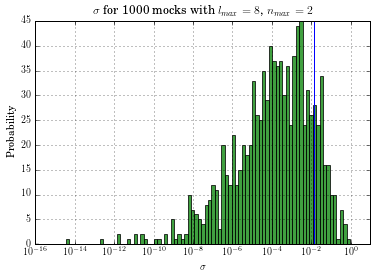

In [8]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(sigmas_dev,bins=np.logspace(-16, 1, 100), facecolor='green', alpha=0.75)
plt.gca().set_xscale("log")
#n, bins, patches = plt.hist(pvals,bins=np.linspace(0.9, 1.0, 100), facecolor='green', alpha=0.75)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'$\sigma$')
plt.ylabel('Probability')
plt.title(r'$\sigma$ for 1000 mocks with $l_{max}=8$, $n_{max}=2$')
#plt.xlim(0.95,1)

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(np.mean(sigmas_dev))

plt.show()

In [170]:

U, s, V_star = np.linalg.svd(beatbox.You.A)
inv_A = np.dot(V_star.T, np.dot(np.diag(1./s),U.T))
print 1./s
print inv_A
print beatbox.You.all_reconstructed_universes[-1].fn
print beatbox.You.all_reconstructed_universes[-1].fn.reshape(len(beatbox.You.all_reconstructed_universes[-1].fn),1)-beatbox.You.all_simulated_universes[-1].fn.reshape(len(beatbox.You.all_reconstructed_universes[-1].fn),1)

[  1.11041680e-07   2.88377558e-07   4.80181154e-07   8.26774495e-07
   1.23768207e-06   1.60859203e-06   2.70338824e-06   3.34272998e-06
   6.29330054e-06   8.92797364e-06   1.10486073e-05   1.67666719e-05
   3.33349417e-05   3.88907546e-05   6.17672684e-05   7.24854402e-05
   1.30280548e-04   1.55445781e-04   1.77933258e-04   3.09353903e-04
   4.81708946e-04   1.68444851e-03   3.12952583e-03   5.17118656e-03
   2.59995053e-02   3.56403401e-02   1.08164343e-01   1.20928470e-01
   2.59239326e-01   9.51462063e-01   1.85560165e+01   1.85560165e+01
   1.85560166e+01   1.85560166e+01   1.85560166e+01   1.85560166e+01
   2.86924037e+01   2.86924039e+01   2.86924040e+01   2.86924040e+01
   2.86924040e+01   2.86924041e+01   2.86924041e+01   2.86924043e+01
   4.89650767e+01   5.30328773e+01   5.30328775e+01   5.30328777e+01
   5.30328779e+01   5.30328779e+01   5.30328779e+01   5.30328780e+01
   5.30328780e+01   5.30328782e+01   5.30328783e+01   5.30328783e+01
   5.30328785e+01   1.45845268e+02

In [15]:
beatbox.You.all_reconstructed_universes[0].rearrange_fn_from_vector_to_grid()
beatbox.You.all_reconstructed_universes[0].evaluate_potential_given_fourier_coefficients()

Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.7946298


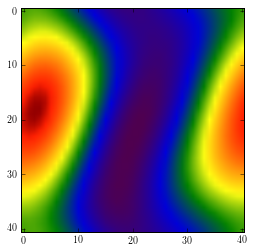

In [16]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(beatbox.You.all_simulated_universes[0].phi[:,:,20])

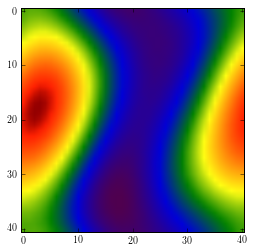

In [17]:
plt.imshow(beatbox.You.all_reconstructed_universes[0].phi[:,:,20])

In [158]:
100*0.1

10.0

In [ ]:
Universe.high_k_cutoff = Universe.truncated_nmax*Universe.Deltak
Universe.low_k_cutoff = Universe.truncated_nmin*Universe.Deltak
    
    # Define the filter
low_k_filter = (~(Universe.n < Universe.truncated_nmin)).astype(int)
high_k_filter = (~(Universe.n > Universe.truncated_nmax)).astype(int)
Universe.kfilter = high_k_filter*low_k_filter

In [ ]:
from scipy.special import sph_harm,sph_jn
truncated_nmax = Universe.truncated_nmax
truncated_nmin = Universe.truncated_nmin
truncated_lmax = Universe.truncated_lmax
truncated_lmin = Universe.truncated_lmin
lms = Universe.lms
kfilter = Universe.kfilter
    
    # Initialize R matrix:
NY = (truncated_lmax + 1)**2 - (truncated_lmin)**2
    # Find the indices of the non-zero elements of the filter
ind = np.where(Universe.kfilter>0)
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
    #    for the sin coefficients
NN = 2*len(ind[1])
Universe.R = np.zeros([NY,NN], dtype=np.complex128)

k, theta, phi = Universe.k[ind], np.arctan2(Universe.ky[ind],Universe.kx[ind]), np.arccos(Universe.kz[ind]/Universe.k[ind])
    # We need to fix the 'nan' theta element that came from having ky=0
theta[np.isnan(theta)] = np.pi/2.0
    
    # Get ready to loop over y
y = 0
A = [sph_jn(truncated_lmax,ki)[0] for ki in k]        
    # Loop over y, computing elements of R_yn 
for i in lms:        
    l = i[0]
    m = i[1]
        
    trigpart = np.cos(np.pi*l/2.0)
    B = np.asarray([A[ki][l] for ki in range(len(k))])
    Universe.R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    Universe.R[y,NN/2:] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y = y+1  

In [25]:
-8400.+(1.4-12.2)*110.

-9588.0

In [176]:
(67-39)*.26

7.28

In [11]:
num=5
postn=np.zeros(1000)
for i in range(1000):
    postn[i] = beatbox.You.all_simulated_universes[-1-i].fn[num] 
    
n, bins, patches = plt.hist(postn, 20, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[num])

#plt.axvline(We.fn[5])

plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
82075
5sec exposure
offsets:
+1.4 RA -2.6DEC

focus -9425 seeing 1.4 20:25